# HG data

In [128]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
import os
import sys
import glob
import time
import warnings
import datetime 
import matplotlib.dates as mdates
print("Last updated on ", time.asctime())

Last updated on  Thu May 21 19:02:46 2020


In [130]:
import numpy as np
import pandas as pd
import matplotlib

In [4]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [91]:
datapath="/Users/jjgomezcadenas/Projects/Development/C19/data/HospitalesGalicia"
file = "IngresosCovid.csv"
filep = "PacientesCOVID.csv"
ff =f'{datapath}/{file}'
fp =f'{datapath}/{filep}'
dfi = pd.read_csv(ff, sep='|')

In [24]:
dfi.head()

,Paciente,Ingreso,Alta,Hosp,Unnamed: 4
0,8,18/03/2020,26/03/2020,HOS,NaN
1,9,29/03/2020,24/04/2020,HOS,NaN
2,10,27/03/2020,07/04/2020,HOS,NaN
3,10,14/04/2020,30/04/2020,HOS,NaN
4,12,23/03/2020,09/04/2020,HOS,NaN


In [26]:
type(dfi.Ingreso.values[0])

str

In [27]:
def date_spanish_str_to_datetime(d):
    if type(d) != str: # this may be a nan because patient still not released set it to infnt
        dt = datetime.datetime(int(2030), int(1), int(1))
    else:
        day, month, year = d.split("/")
        dp, mp, yp = day, month, year
        dt = datetime.datetime(int(year), int(month), int(day))
    return dt

    
def hg_get_data_ingresos(datapath):
    dfi = pd.read_csv(datapath, sep='|')
    P  = dfi['Paciente'].values
    sI = dfi['Ingreso'].values
    sA = dfi['Alta'].values
    H  = dfi['Hosp'].values
    
    dI = [date_spanish_str_to_datetime(d) for d in sI]
    dA = [date_spanish_str_to_datetime(d) for d in sA]
    
    return pd.DataFrame({"pacienteID":P,"ingreso":dI,"alta":dA,"hosp":H})
   

In [28]:
hgi =hg_get_data_ingresos(ff)

In [29]:
hgi.head()

,pacienteID,ingreso,alta,hosp
0,8,2020-03-18,2020-03-26,HOS
1,9,2020-03-29,2020-04-24,HOS
2,10,2020-03-27,2020-04-07,HOS
3,10,2020-04-14,2020-04-30,HOS
4,12,2020-03-23,2020-04-09,HOS


In [53]:
np = hgi.groupby(['ingreso']).pacienteID.count()

In [64]:
np.head()

ingreso
2019-12-23    1
2020-01-11    1
2020-01-12    1
2020-01-18    1
2020-01-19    1
Name: pacienteID, dtype: int64

In [60]:
def formatter(ax):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

def formats(ax, xlabel, ylabel, logscale=False):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logscale:
        plt.yscale('log')


In [62]:
def plot_hgi(nps, figsize=(14,14)):
  
    fig = plt.figure(figsize=figsize)
  
    X = nps.index
    Y = nps.values
    ax      = fig.add_subplot(111)
    plt.plot(X, Y, 'bo')
    formats(ax,'ingresos','casos',False)
    formatter(ax)
    plt.show()

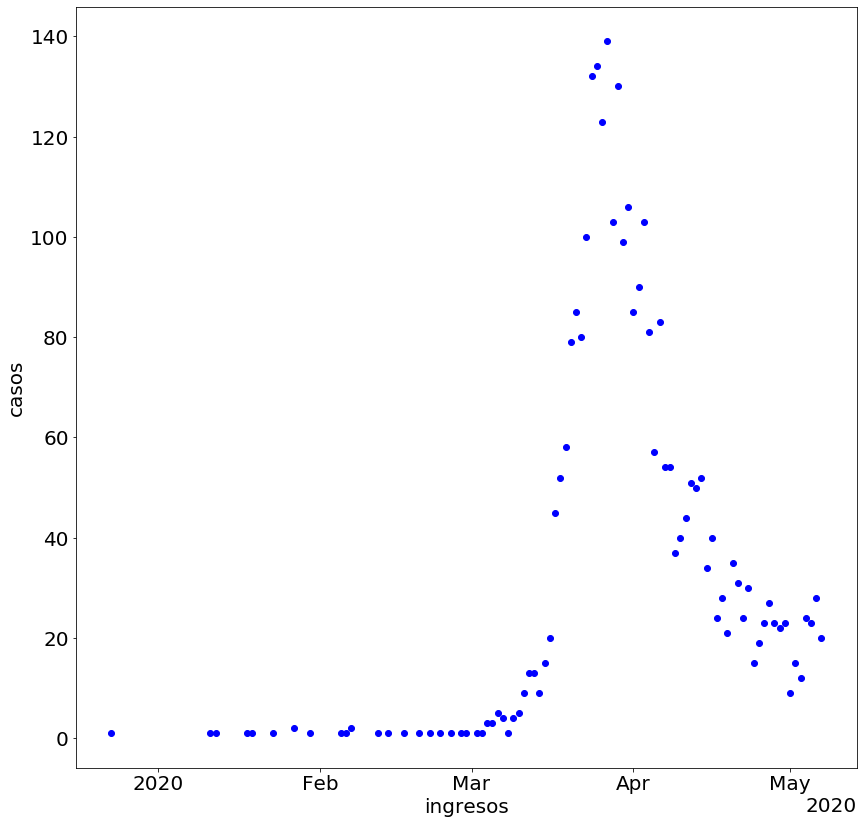

In [63]:
plot_hgi(np, figsize=(14,14))

In [78]:
def recovery_time(hgi):
    tR = []
    for ti, group in hgi.groupby(['ingreso']).alta:
        #print(f'ti={ti}')
        #print(f'group index ={group.index} group values {group.values}')
        tas = group.values
        for ta in tas:
            nt = ti.to_datetime64()
            dt = ta - nt
            dtd = pd.to_datetime(dt).day
            tR.append(dtd)
    return tR
    
    

In [79]:
tR = recovery_time(hgi)

(array([392., 525., 593., 487., 355., 205., 150.,  83.,  76., 158.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

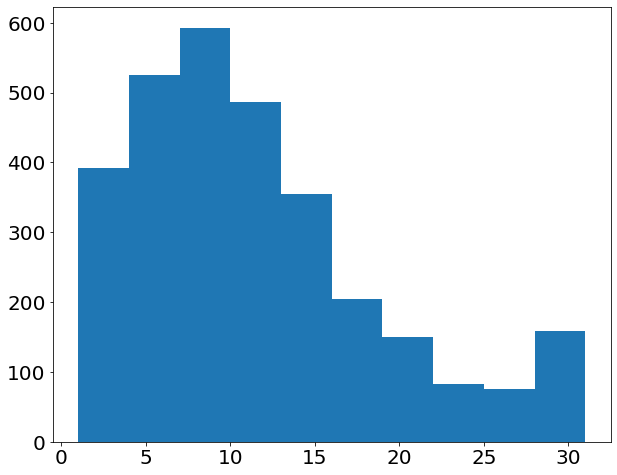

In [80]:
plt.hist(tR)

In [84]:
def hosp_uci(hgi):
    nH = []
    nU = []
    tD = []
    for ti, group in hgi.groupby(['ingreso']).hosp:
        tD.append(ti)
        #print(f'ti={ti}')
        #print(f'group index ={group.index} group values {group.values}')
        nh = 0
        nu = 0
        for g in group:
            if g == 'HOS': 
                nh += 1
            elif g == 'UCI':
                nu += 1
        nH.append(nh)
        nU.append(nu)
    return tD, nH, nU
            
                
        


In [85]:
tD, nH, nU = hosp_uci(hgi) 

In [87]:
def plot_nh_nu(tD, nH, nU, figsize=(14,14)):
  
    fig = plt.figure(figsize=figsize)
  
    ax      = fig.add_subplot(2,1,1)
    plt.plot(tD, nH, 'bo')
    formats(ax,'ingresos','hospital',False)
    formatter(ax)

    ax      = fig.add_subplot(2,1,2)
    plt.plot(tD, nU, 'bo')
    formats(ax,'ingresos','uci',False)
    formatter(ax)

    plt.show()

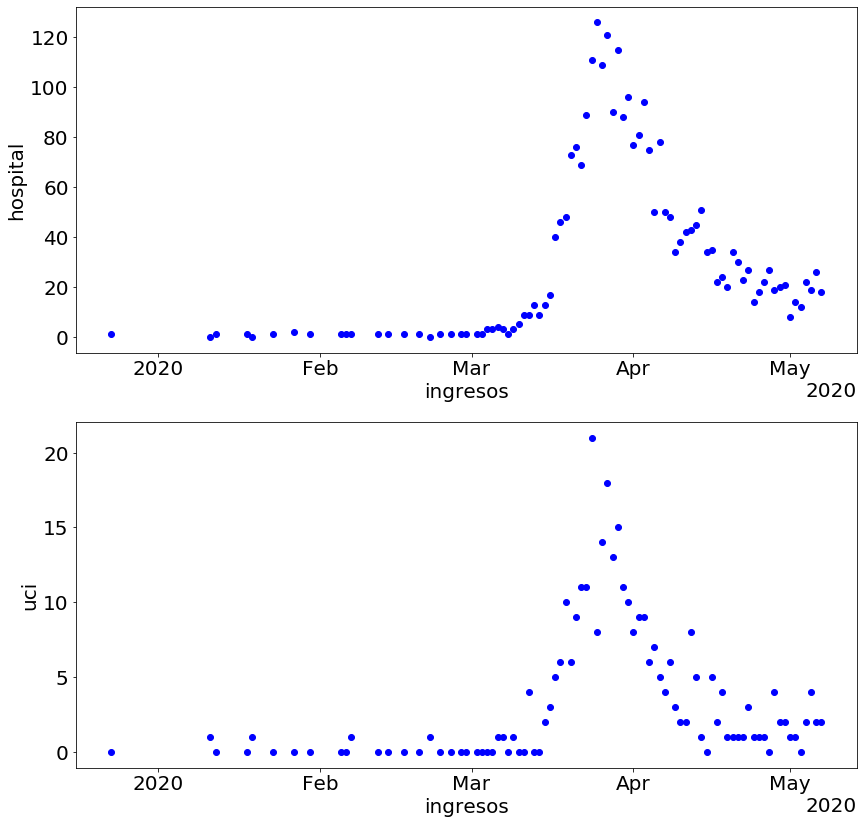

In [88]:
plot_nh_nu(tD, nH, nU, figsize=(14,14))

In [96]:
def hg_get_data_pacientes(datapath):
    dfi = pd.read_csv(datapath, sep='|')
    P  = dfi['Paciente'].values
    sI = dfi['Ingreso'].values
    sA = dfi['Alta'].values
    E  = dfi['Edad'].values
    S  = dfi['Sexo'].values
    C  = dfi['Code'].values
    
    dI = [date_spanish_str_to_datetime(d) for d in sI]
    dA = [date_spanish_str_to_datetime(d) for d in sA]
    
    return pd.DataFrame({"pacienteID":P,"ingreso":dI,"alta":dA,"edad":E,"sexo":S,"code":C})


In [95]:
dfp = pd.read_csv(fp, sep='|')
dfp.head()

,Paciente,Ingreso,Edad,Sexo,Alta,Code,Registro,ZIP,Unnamed: 8
0,1,25/03/2020,102,Mujer,30/03/2020,EXITUS,"A.S. OURENSE, VERIN E O BARCO",32633.0,NaN
1,2,27/03/2020,101,Mujer,31/03/2020,EXITUS,A.S. VIGO,36205.0,NaN
2,3,27/03/2020,100,Mujer,19/04/2020,EXITUS,"A.S. OURENSE, VERIN E O BARCO",32800.0,NaN
3,4,01/04/2020,99,Mujer,24/04/2020,EXITUS,A.S. A CORU�A E CEE,15009.0,NaN
4,5,28/03/2020,99,Mujer,05/04/2020,EXITUS,"A.S. OURENSE, VERIN E O BARCO",32710.0,NaN


In [97]:
dfp = hg_get_data_pacientes(fp)

In [98]:
dfp.head()

,pacienteID,ingreso,alta,edad,sexo,code
0,1,2020-03-25,2020-03-30,102,Mujer,EXITUS
1,2,2020-03-27,2020-03-31,101,Mujer,EXITUS
2,3,2020-03-27,2020-04-19,100,Mujer,EXITUS
3,4,2020-04-01,2020-04-24,99,Mujer,EXITUS
4,5,2020-03-28,2020-04-05,99,Mujer,EXITUS


In [99]:
def exitus_time(dfp, sexo='Hombre'):
    df    = dfp.loc[dfp.code == "EXITUS", ('pacienteID', 'ingreso', 'alta', 'edad', 'sexo')]
    dfs   = df.loc[df.sexo == sexo, ('pacienteID', 'ingreso', 'alta', 'edad')]
    tR = []
    for ti, group in dfs.groupby(['ingreso']).alta:
        #print(f'ti={ti}')
        #print(f'group index ={group.index} group values {group.values}')
        tas = group.values
        for ta in tas:
            nt = ti.to_datetime64()
            dt = ta - nt
            dtd = pd.to_datetime(dt).day
            tR.append(dtd)
    return tR


In [168]:
thE = exitus_time(dfp, sexo='Hombre')

(array([55., 68., 56., 40., 20., 19., 20.,  9., 11.,  9.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

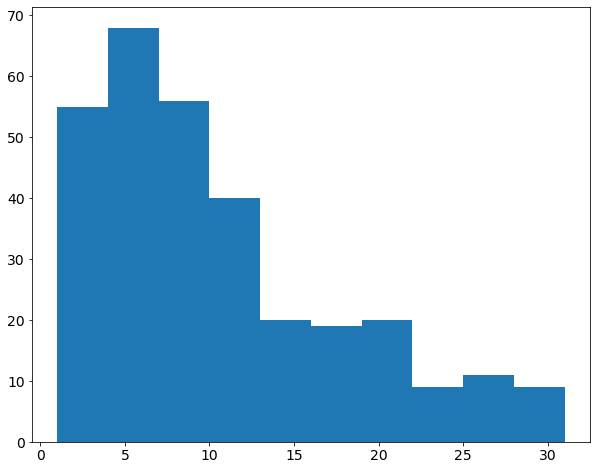

In [169]:
plt.hist(thE)

In [102]:
tmE = exitus_time(dfp, sexo='Mujer')

(array([34., 42., 38., 49., 15., 22.,  8., 12.,  6., 11.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

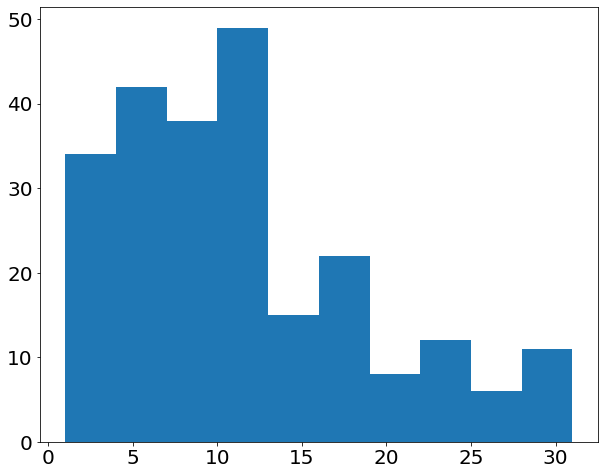

In [103]:
plt.hist(tmE)

In [122]:
def plot_XY_series(ss,xlabel='ingresos',ylabel='casos',figsize=(14,14)):
    fig = plt.figure(figsize=figsize)
    X = ss.index
    Y = ss.values
    print(type(X[0]))
    ax      = fig.add_subplot(111)
    plt.plot(X, Y, 'bo')
    formats(ax,xlabel,ylabel,False)
    formatter(ax)
    plt.show()


In [ ]:
def exitus_age(dfp, sexo='Hombre',figsize=(14,14)):
    df    = dfp.loc[dfp.code == "EXITUS", ('pacienteID', 'ingreso', 'alta', 'edad', 'sexo')]
    dfs   = df.loc[df.sexo == sexo, ('pacienteID', 'ingreso', 'alta', 'edad')]
    np = dfs.groupby(['ingreso']).edad.count()
    
    fig = plt.figure(figsize=figsize)
  
    X = np.index
    Y = np.values
    ax      = fig.add_subplot(111)
    plt.plot(X, Y, 'bo')
    formats(ax,'ingresos','casos',False)
    formatter(ax)
    plt.show()


In [ ]:
def exitus_age(dfp, sexo='Hombre',figsize=(14,14)):
    df    = dfp.loc[dfp.code == "EXITUS", ('pacienteID', 'ingreso', 'alta', 'edad', 'sexo')]
    
    if sexo == "Hombre" or sexo == "Mujer":
        dfs   = df.loc[df.sexo == sexo, ('pacienteID', 'ingreso', 'alta', 'edad')]
    else:
        dfs = df
    tR = []
    np =dfs.groupby(['edad']).pacienteID.count:
   

In [164]:
def exitus(dfp, sexo='Hombre',groupby='edad'):
    df    = dfp.loc[dfp.code == "EXITUS", ('pacienteID', 'ingreso', 'alta', 'edad', 'sexo')]
    
    if sexo == "Hombre" or sexo == "Mujer":
        dfs   = df.loc[df.sexo == sexo, ('pacienteID', 'ingreso', 'alta', 'edad')]
    else:
        dfs = df
        
    np =dfs.groupby([groupby]).pacienteID.count()
    
    print(f' exitus fraction = {len(df)/len(dfp)}')
    return np


In [170]:
ex = exitus(dfp, sexo='all',groupby='edad')

 exitus fraction = 0.05203749760857088


In [157]:
dfc = exitus(dfp, sexo='all',groupby='ingreso')

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


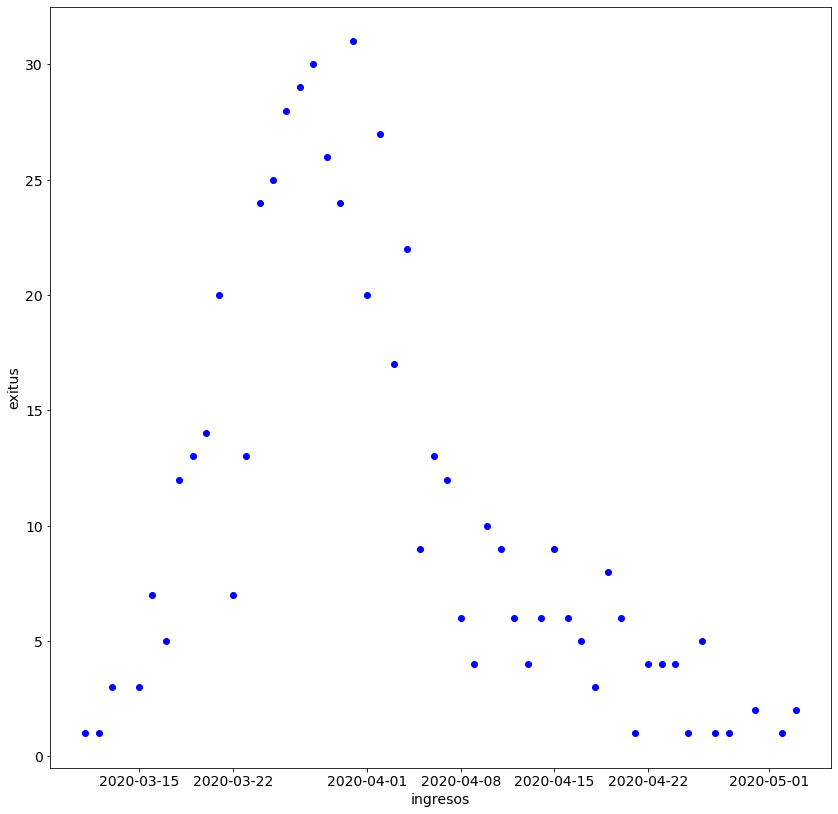

In [171]:
plot_XY_series(dfc,xlabel='ingresos',ylabel='exitus',figsize=(14,14))

In [162]:
def bin_shift(bins):
    BINS = []
    for i in range(len(bins) -1):
        b = (bins[i] + bins[i+1]) / 2
        BINS.append(b)
    return BINS

def hist_XY_series(ss,xlabel='ingresos',ylabel='casos',figsize=(14,14)):
    fig = plt.figure(figsize=figsize)
    bins = np.linspace(ss.index.min(), ss.index.max(), 10)
    groups = ss.groupby(pd.cut(ss.index, bins))
    
    vals = groups.mean().values
    ax      = fig.add_subplot(111)
    xbins = bin_shift(bins)
    print(xbins)
    print(vals)
    
    tot = np.sum(vals)
    plt.plot(xbins, vals/tot, 'bo')
    ax.vlines(xbins, 0, vals/tot, colors='b', lw=5, alpha=0.5)

    formats(ax,xlabel,ylabel,False)
    
    plt.show()


[38.72222222222222, 46.166666666666664, 53.611111111111114, 61.05555555555556, 68.5, 75.94444444444446, 83.38888888888889, 90.83333333333334, 98.27777777777777]
[ 2.          1.5         2.33333333  3.          6.25       11.71428571
 23.5        20.85714286  4.625     ]


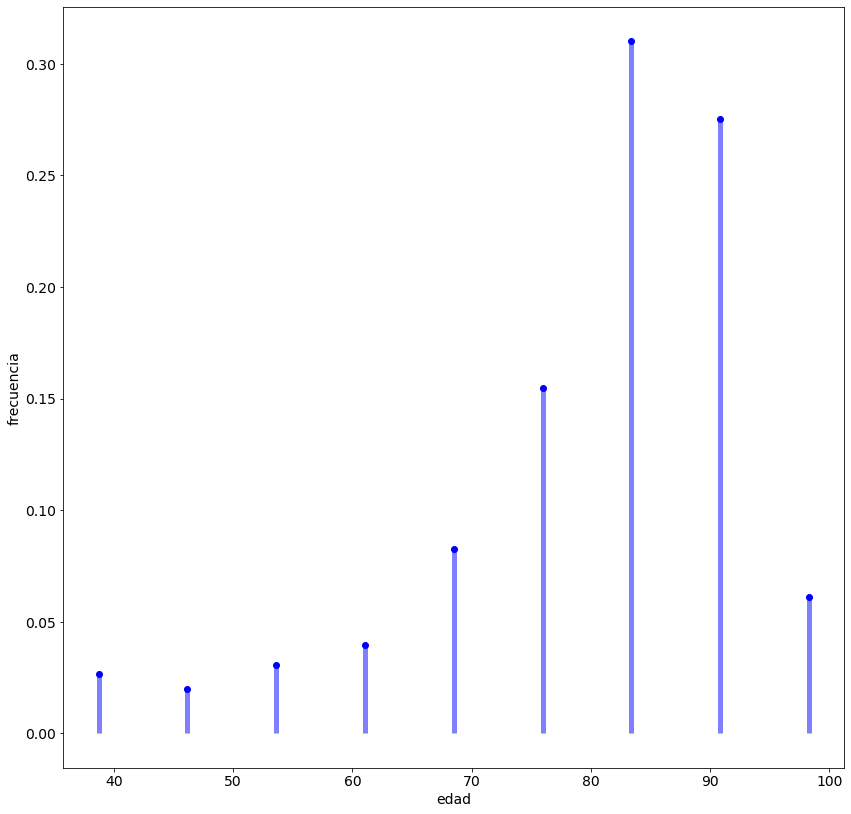

In [163]:
hist_XY_series(ex,xlabel='edad',ylabel='frecuencia',figsize=(14,14))